In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# Set the default font style and size
mpl.rcParams['font.family'] = 'Times New Roman' # change the font style to Times New Roman
mpl.rcParams['font.size'] = 14 # change the font size to 14

In [3]:
# Load the "US-News-Rankings-Universities" dataset
us_data = pd.read_excel('US-News-Rankings-Universities.xlsx', engine='openpyxl', sheet_name = "Compiled 1984-2023 Selective")
us_data

,"When using, please cite as: Andrew G. Reiter, “U.S. News & World Report Historical Liberal Arts College and University Rankings,” available at: http://andyreiter.com/datasets/",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,University Name,IPEDS ID,State,2023.0,2022.0,2021.0,2020.0,2019.0,2018.0,2017.0,...,1995.0,1994.0,1993.0,1992.0,1991.0,1990.0,1989.0,1988.0,1986.0,1984.0
1,Princeton University,186131,NJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0
2,Massachusetts Institute of Technology,166683,MA,2.0,2.0,4.0,3.0,3.0,5.0,7.0,...,4.0,4.0,5.0,6.0,6.0,7.0,5.0,11.0,NaN,10.0
3,Harvard University,166027,MA,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0
4,Yale University,130794,CT,3.0,5.0,4.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,University of Cincinnati,201885,OH,NaN,148.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,University of Mississippi,176017,MS,NaN,148.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,Ohio University,204857,OH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,University of Arkansas,106397,AR,NaN,NaN,NaN,153.0,147.0,133.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Data Cleaning

# Select all numeric columns
numeric_cols = us_data.select_dtypes(include='number').columns

# Round these columns
us_data[numeric_cols] = us_data[numeric_cols].round().astype('Int64')  # Use 'Int64' to maintain NaN values

# Drop the header and set the first row as the header
new_header = us_data.iloc[0]
us_data = us_data[1:]
us_data.columns = new_header
us_data.columns = us_data.columns.astype(str)
us_data.columns = [int(col) if col.isdigit() else col for col in us_data.columns]

# Rename the columns to make it more understandable
us_data = us_data.rename(columns={'University Name': 'University', 'IPEDS ID': 'ID'})

us_data = us_data.reset_index(drop=True)
us_data.to_excel('cleaned_us_data.xlsx', index=False)

us_data.head()

,University,ID,State,2023,2022,2021,2020,2019,2018,2017,...,1995,1994,1993,1992,1991,1990,1989,1988,1986,1984
0,Princeton University,186131,NJ,1,1,1,1,1,1,1,...,2,2,2,4,4,2,2,4,4,4
1,Massachusetts Institute of Technology,166683,MA,2,2,4,3,3,5,7,...,4,4,5,6,6,7,5,11,<NA>,10
2,Harvard University,166027,MA,3,2,2,2,2,2,2,...,1,1,1,1,1,3,4,2,2,2
3,Yale University,130794,CT,3,5,4,3,3,3,3,...,3,3,3,2,3,1,1,3,2,3
4,Stanford University,243744,CA,3,6,6,6,7,5,5,...,5,6,4,3,2,6,6,1,1,1


### **1. Line Chart Depicting the Fluctuations in the US News Top 10 Rankings Over Various Years**

In [5]:
# Filter out the top 10 universities based on their 2023 ranking
top_10_2023 = us_data.sort_values(by=2023, ascending=True).head(10)

# Extract the rankings for these top 10 universities over the last 10 years
last_10_years = us_data.columns[3:13].tolist()
top_10_rankings = top_10_2023[['University'] + last_10_years]

top_10_rankings.head()

,University,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014
0,Princeton University,1,1,1,1,1,1,1,1,1,1
1,Massachusetts Institute of Technology,2,2,4,3,3,5,7,7,7,7
2,Harvard University,3,2,2,2,2,2,2,2,2,2
3,Yale University,3,5,4,3,3,3,3,3,3,3
4,Stanford University,3,6,6,6,7,5,5,4,4,5


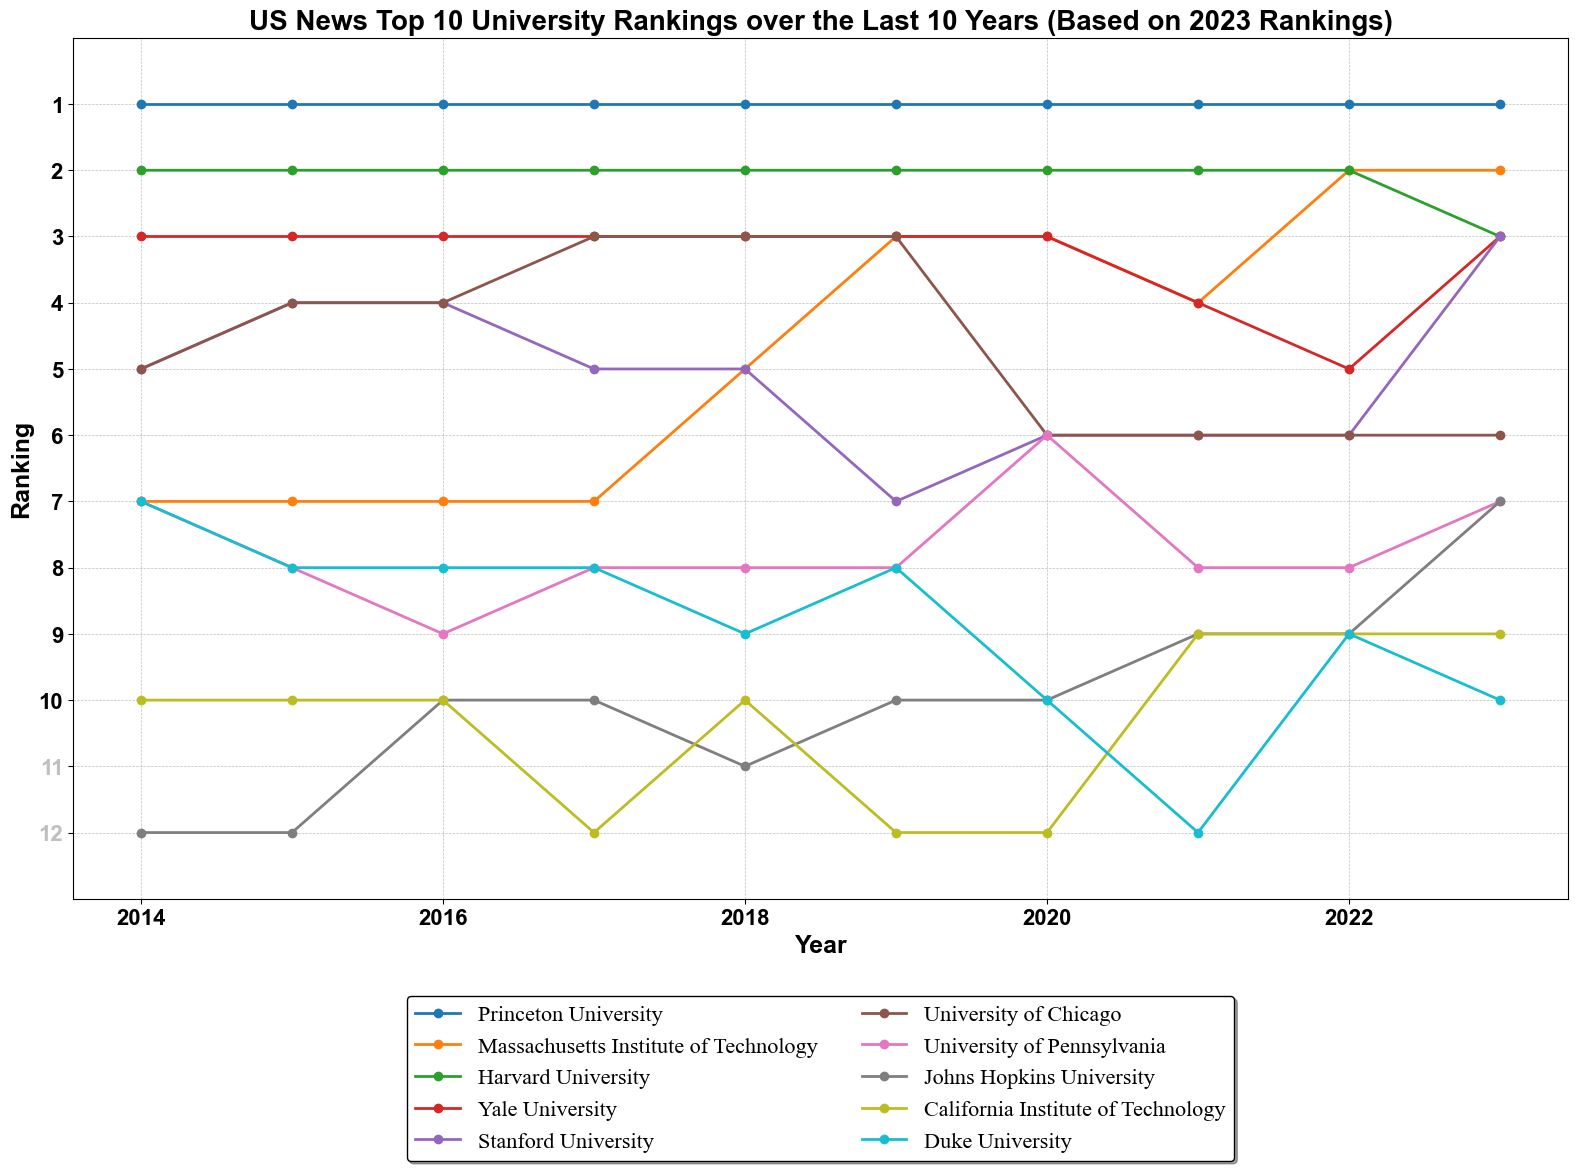

In [6]:
# Plotting
plt.figure(figsize=(16, 12))

# Define colors for different universities
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Plot each university's rankings over the last 10 years
for index, (idx, row) in enumerate (top_10_rankings.iterrows()):
    plt.plot(last_10_years, row[1:].values, label = row['University'], marker = 'o', color = colors[index], linestyle = '-', linewidth = 2)

# Add labels, title, legend, and font settings etc.
plt.title ('US News Top 10 University Rankings over the Last 10 Years (Based on 2023 Rankings)'
           , fontsize = 20, fontname = 'Arial', fontweight = 'bold')
plt.xlabel ('Year', fontsize = 18, fontname = 'Arial', fontweight = 'bold')
plt.ylabel ('Ranking', fontsize = 18, fontname = 'Arial', fontweight = 'bold') 
plt.gca().set_ylim(13,0) # adjust y-axis range to ensure all lines are visible
plt.xticks(fontsize = 16, fontname = 'Arial', fontweight = 'bold')
plt.yticks(range(1,13), fontsize = 16, fontname = 'Arial', fontweight = 'bold')

# Change the color of the ticks after the 10th tick
for label in plt.gca().get_yticklabels():
    if label.get_text()in ['11','12']:
        label.set_color('grey')
        label.set_alpha(0.5)

plt.legend (loc = 'upper center', bbox_to_anchor = (0.5, -0.1), ncol = 2, fontsize = 16, fancybox = True, shadow = True, frameon = True, edgecolor = 'black', facecolor = 'white')
plt.grid (True, which = 'both', linestyle = '--', linewidth = 0.5, color = 'grey', alpha = 0.5)
plt.tight_layout()

#Show the plot
plt.show()


### **2. Box Plot Illustrating Variations in the US News Top 10 Rankings Over the Years**

In [7]:
# Reverse the order of the universities for plotting box plot
top_10_rankings.set_index('University',inplace=True)
top_10_rankings = top_10_rankings.sort_values(by=2023, ascending=True, kind = 'mergesort')
top_10_rankings.head()

,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014
University,,,,,,,,,,
Princeton University,1,1,1,1,1,1,1,1,1,1
Massachusetts Institute of Technology,2,2,4,3,3,5,7,7,7,7
Harvard University,3,2,2,2,2,2,2,2,2,2
Yale University,3,5,4,3,3,3,3,3,3,3
Stanford University,3,6,6,6,7,5,5,4,4,5


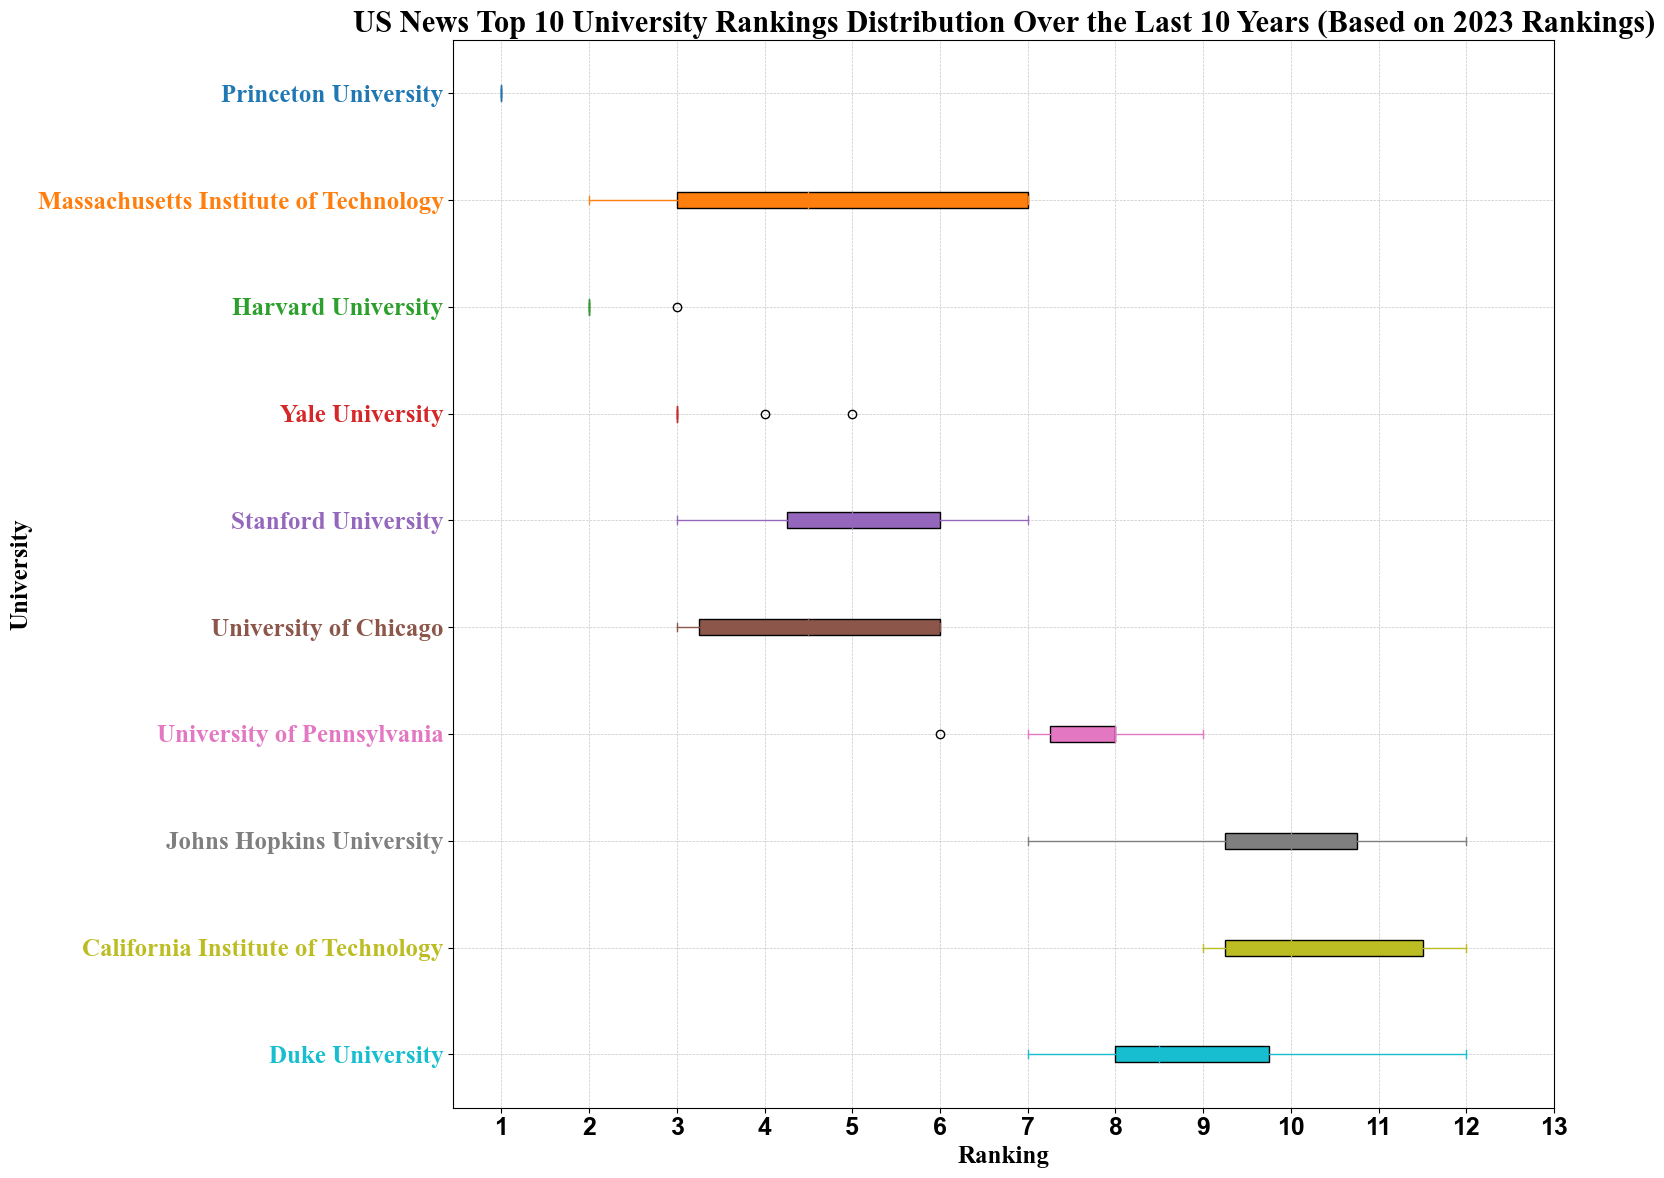

In [8]:
plt.figure(figsize=(16, 12))
box_colors = plt.cm.tab10.colors  # define colors for different universities

# Plot each university's rankings over the last 10 years
for index, (university_name, row_data) in enumerate(top_10_rankings.iterrows()): 
    # Drop NaN values
    box_data = row_data.dropna()
    # Reverse the order of the data to match the order of the universities
    position = len(top_10_rankings) - index
    boxplot = plt.boxplot(box_data, vert=False, positions=[position], patch_artist=True)

    # Set the color of the box
    for patch in boxplot['boxes']:
        patch.set_facecolor(box_colors[index % len(box_colors)]) # set facecolor to the color of the university

    # Set the color of the whiskers, fliers, caps, and medians
    for element in ['whiskers', 'fliers', 'caps', 'medians']:
        plt.setp(boxplot[element], color=box_colors[index % len(box_colors)])

plt.title('US News Top 10 University Rankings Distribution Over the Last 10 Years (Based on 2023 Rankings)',
          fontsize=22, fontweight='bold')
plt.xlabel('Ranking', fontsize=18, fontweight='bold')
plt.ylabel('University', fontsize=18, fontweight='bold')

# Set the yticks and yticklabels
ytick_positions = [len(top_10_rankings) - i for i in range(len(top_10_rankings))]
ytick_labels = top_10_rankings.index.tolist()  # get the university names
plt.yticks(ticks=ytick_positions, labels=ytick_labels, fontsize=18, fontweight='bold')

# Set the xticks and xticklabels
plt.xticks(range(1,14), fontsize = 16, fontname = 'Arial', fontweight = 'bold')

# Set the color of the yticklabels
for i, tick_label in enumerate(plt.gca().get_yticklabels()):
    tick_label.set_color(box_colors[i % len(box_colors)])

plt.xticks(fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.show()

### **3. Line Chart Depicting the Fluctuations of Vanderbilt University Rankings Over Various Years**

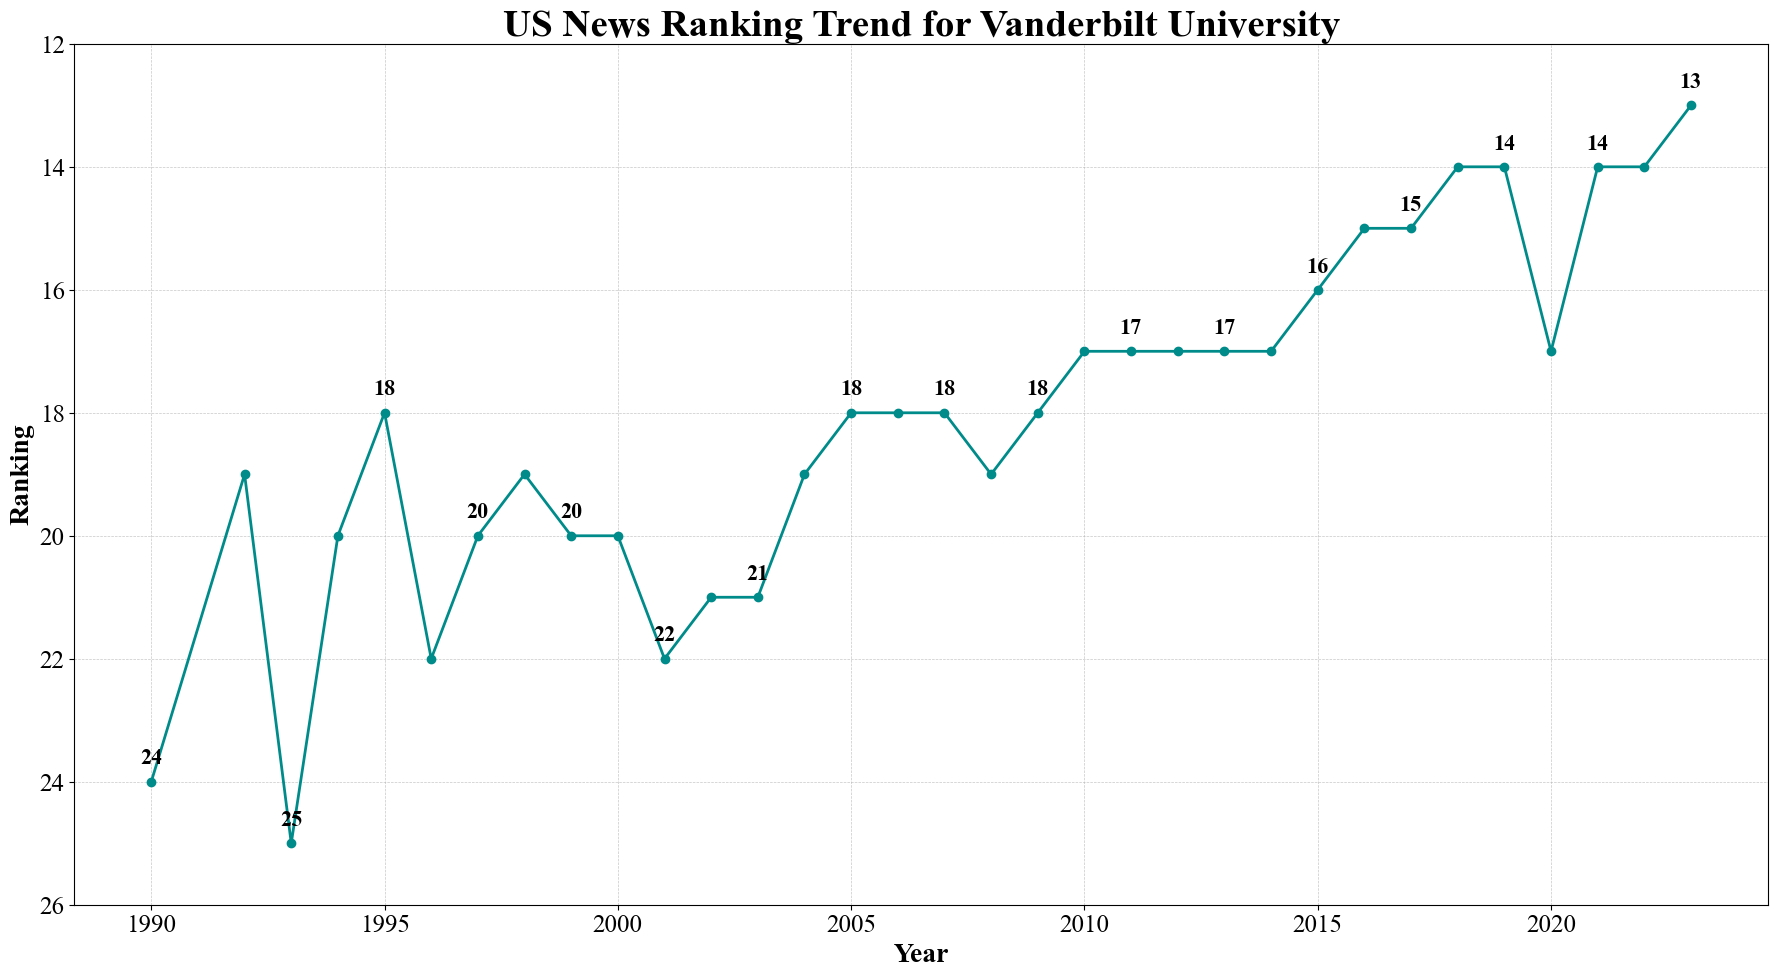

In [9]:
# Extract all years' rankings for Vanderbilt University
vanderbilt_all_rankings = us_data[us_data['University'] == 'Vanderbilt University'].iloc[:, 3:].T
vanderbilt_all_rankings = vanderbilt_all_rankings.rename(columns={vanderbilt_all_rankings.columns[0]: 'Ranking'})

# Drop rows with missing values for Vanderbilt University
vanderbilt_cleaned_rankings = vanderbilt_all_rankings.dropna()

# Plotting the cleaned ranking trend for Vanderbilt University for all years
plt.figure(figsize=(18, 10))
plt.plot(vanderbilt_cleaned_rankings.index, vanderbilt_cleaned_rankings['Ranking'], marker='o', color='darkcyan', linestyle='-', linewidth=2)

# Adding labels for each even data point
for i, (year, rank) in enumerate(vanderbilt_cleaned_rankings.iterrows()): 
    if i % 2 == 0: # Check if the index is even (every second year) 
        plt.text(year, rank['Ranking'] - 0.2, f"{rank['Ranking']:.0f}",
                 ha='center',fontsize = 16, fontweight = 'bold', va='bottom')

plt.ylim(12, 26) # adjust y-axis range

# Add labels, title, legend, and font settings etc.
plt.title('US News Ranking Trend for Vanderbilt University', 
          fontsize=28, fontweight='bold')
plt.xlabel('Year', fontsize=20, fontweight='bold')
plt.ylabel('Ranking', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.gca().invert_yaxis()  # Invert y axis so that 1st rank is at the top
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


### **4. Comparison of National Rankings of US Universities between US News and QS**

In [10]:
qs_data = pd.read_csv('2024 QS World University Rankings 1.1 (For qs.com).csv')
qs_data

,2024 RANK,2023 RANK,Institution Name,Country Code,Country,SIZE,FOCUS,RES.,AGE,STATUS,...,International Faculty Rank,International Students Score,International Students Rank,International Research Network Score,International Research Network Rank,Employment Outcomes Score,Employment Outcomes Rank,Sustainability Score,Sustainability Rank,Overall SCORE
0,rank display,rank display2,institution,location code,location,size,focus,research,age band,status,...,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,SUS SCORE,SUS RANK,Overall Score
1,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,...,56,88.2,128,94.3,58,100,4,95.2,51,100.0
2,2,2,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,...,64,95.8,85,99.9,7,100,6,97.3,33=,99.2
3,3,4,University of Oxford,UK,United Kingdom,L,FC,VH,5,A,...,110,98.2,60,100.0,1,100,3,97.8,26=,98.9
4,4,5,Harvard University,US,United States,L,FC,VH,5,B,...,210,66.8,223,100.0,5,100,1,96.7,39,98.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,1401+,1401+,University of Oradea,RO,Romania,L,FC,MD,4,A,...,701+,7.0,701+,1.8,701+,5.9,701+,2.2,701+,-
1494,1401+,NaN,University of Stavanger,NO,Norway,NaN,CO,NaN,2,NaN,...,NaN,NaN,NaN,26.3,489,NaN,NaN,NaN,NaN,-
1495,1401+,1201-1400,"University Politehnica of Timisoara, UPT",RO,Romania,M,FO,VH,5,A,...,701+,2.9,701+,1.3,701+,8.5,701+,1,701+,-
1496,1401+,1201-1400,Western Washington University,US,United States,L,CO,HI,5,NaN,...,676,1.4,701+,1.0,701+,7.3,701+,NaN,NaN,-


In [11]:
# Filter rows containing US universities and sort them
us_qs_data = qs_data.loc[qs_data['Country'] == 'United States']
us_qs_data = us_qs_data.iloc[0:1375, :] # select the top 1375 US universities
us_qs_data['2023 RANK'] = us_qs_data['2023 RANK'].str.replace("=", "", regex=False) # remove the '=' sign
us_qs_data['2023 RANK'] = pd.to_numeric(us_qs_data['2023 RANK'], errors='coerce') # convert to numeric
us_qs_data['2023 RANK'] = us_qs_data['2023 RANK'].rank(method='min', ascending=True) # add ranking column

# Select only the second and third columns from the sorted US universities data
us_qs_data = us_qs_data.iloc[:, [1, 2]]
us_qs_data = us_qs_data.sort_values(by='2023 RANK', ascending=True) # Sort the data by 2023 ranking
us_qs_data = us_qs_data.rename(columns={'Institution Name': 'University','2023 RANK': 'QS 2023'}) # Change the column name "Institution Name" to "University"

us_qs_data




,QS 2023,University
1,1.0,Massachusetts Institute of Technology (MIT)
5,2.0,Stanford University
4,3.0,Harvard University
15,4.0,California Institute of Technology (Caltech)
11,5.0,University of Chicago
...,...,...
1415,NaN,California State University - Los Angeles
1416,NaN,California State University Long Beach
1420,NaN,Humboldt State University
1421,NaN,Illinois State University


In [12]:
us_data_cleaned = us_data.iloc[:, [0, 3]]
def updated_flexible_match(name, qs_dataframe):
    # Special cases
    special_cases = {
        "University of North Carolina, Chapel Hill":"University of North Carolina-Chapel Hill",
        "University of California, Berkeley (UCB)":"University of California-Berkeley",
        "University of California, Los Angeles (UCLA)":"University of California-Los Angeles"
    }
    
    # Check for special case matches
    if name in special_cases:
        match = qs_dataframe[qs_dataframe['University'] == special_cases[name]]
        if not match.empty:
            return match.iloc[0]['University']  # Return the matching institution name
    
    # Attempt direct match
    direct_match = qs_dataframe[qs_dataframe['University'] == name]
    if not direct_match.empty:
        return direct_match.iloc[0]['University']  # Return the matching institution name
    
    # If direct match fails, try removing content inside parentheses and match again
    name_without_parentheses = ' '.join(s for s in name.split() if not s.startswith('('))
    match_without_parentheses = qs_dataframe[qs_dataframe['University'].str.contains(name_without_parentheses, regex=False, case=False, na=False)]
    if not match_without_parentheses.empty:
        return match_without_parentheses.iloc[0]['University']  # Return the matching institution name
    
    return name
us_qs_data['University'] = us_qs_data['University'].apply(lambda x: updated_flexible_match(x, us_data))
us_qs_data.head()

,QS 2023,University
1,1.0,Massachusetts Institute of Technology
5,2.0,Stanford University
4,3.0,Harvard University
15,4.0,California Institute of Technology
11,5.0,University of Chicago


In [13]:
combined_rank = pd.merge(us_data_cleaned, us_qs_data, on='University', how='left')
# combined_rank.to_excel('combined_rank.xlsx', index=False)
combined_rank = combined_rank.rename(columns={2023:'US NEWS 2023'})
combined_rank = combined_rank.dropna(subset=['US NEWS 2023','QS 2023'])
combined_rank.head()

,University,US NEWS 2023,QS 2023
0,Princeton University,1,7.0
1,Massachusetts Institute of Technology,2,1.0
2,Harvard University,3,3.0
3,Yale University,3,8.0
4,Stanford University,3,2.0


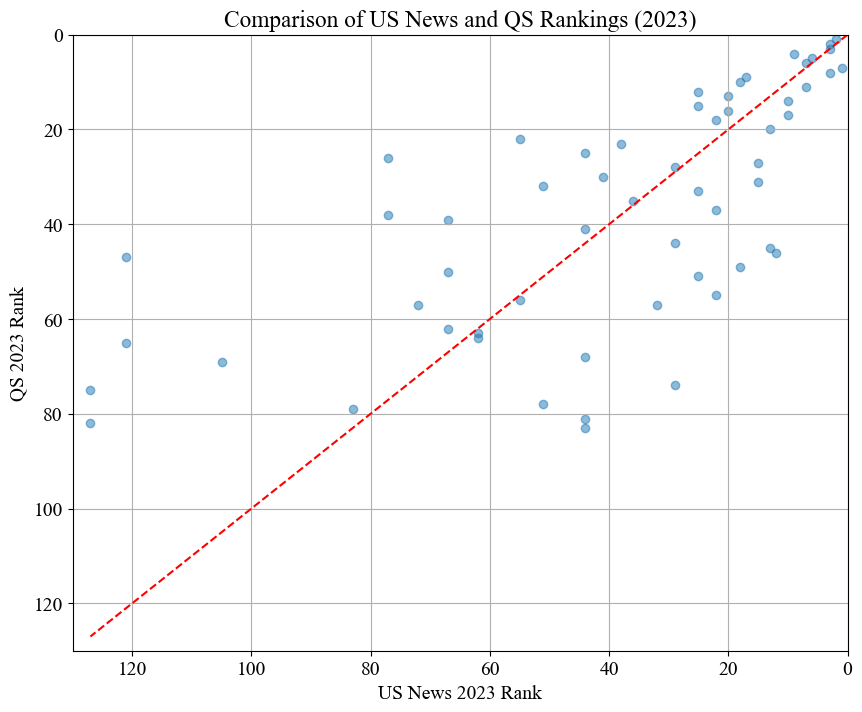

In [14]:
# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(combined_rank['US NEWS 2023'], combined_rank['QS 2023'], alpha=0.5)

# Add a line to indicate the perfect match
max_rank = max(combined_rank['US NEWS 2023'].max(), combined_rank['QS 2023'].max())
plt.plot([0, max_rank], [0, max_rank], 'r--')

plt.ylim(0, 130)
plt.xlim(0, 130)

plt.title('Comparison of US News and QS Rankings (2023)')
plt.xlabel('US News 2023 Rank')
plt.ylabel('QS 2023 Rank')
plt.gca().invert_xaxis() # Set US News rank 1 to be at the top
plt.gca().invert_yaxis() # Set QS rank 1 to be at the top
plt.grid(True)
plt.show()

### **5. Average Rank Changes and Categorical Variables**

In [15]:
qs_data.head()

,2024 RANK,2023 RANK,Institution Name,Country Code,Country,SIZE,FOCUS,RES.,AGE,STATUS,...,International Faculty Rank,International Students Score,International Students Rank,International Research Network Score,International Research Network Rank,Employment Outcomes Score,Employment Outcomes Rank,Sustainability Score,Sustainability Rank,Overall SCORE
0,rank display,rank display2,institution,location code,location,size,focus,research,age band,status,...,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,SUS SCORE,SUS RANK,Overall Score
1,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,...,56,88.2,128,94.3,58,100,4,95.2,51,100.0
2,2,2,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,...,64,95.8,85,99.9,7,100,6,97.3,33=,99.2
3,3,4,University of Oxford,UK,United Kingdom,L,FC,VH,5,A,...,110,98.2,60,100.0,1,100,3,97.8,26=,98.9
4,4,5,Harvard University,US,United States,L,FC,VH,5,B,...,210,66.8,223,100.0,5,100,1,96.7,39,98.3


In [16]:
# Select non-numeric columns
categorical_cols = ['Institution Name', 'Country', 'SIZE', 'FOCUS', 'RES.']

#Convert numbers to integers
def convert_to_int(qs_data):
    for col in qs_data.columns:
        if (col not in (categorical_cols)):
            qs_data[col] = qs_data[col].str.extract('(\d+)').astype(int)
    return qs_data

def clean_qs_data(qs_data):
    
    # drop first row of data
    qs_data.drop(0, axis=0, inplace=True)
    
    # drop any NaN vaules and NaN Overall SCORE
    qs_data = qs_data.dropna()
    qs_data = qs_data.loc[qs_data['Overall SCORE'] != '-']
    
    # concat rank, categorical, and score columns 
    rank_qs_data = qs_data[['2024 RANK', '2023 RANK']] # select rank columns
    cat_qs_data = qs_data[['Institution Name', 'Country', 'SIZE', 'FOCUS', 'RES.', 'AGE']] # select categorical columns
    score_cols = [col for col in qs_data.columns if 'score' in col.lower()] # get all score columns without distinguishing between upper and lower case
    score_qs_data = qs_data[score_cols] # select score columns
    qs_data = pd.concat([rank_qs_data, cat_qs_data, score_qs_data], axis=1) # concat all columns to create new dataframe
    
    # convert object types to int types 
    qs_data = convert_to_int(qs_data)
    
    # create rank change column
    qs_data['Rank Change'] = qs_data['2023 RANK'] - qs_data['2024 RANK']
    
    
    return qs_data

In [17]:
qs_data = clean_qs_data(qs_data)
qs_data.head()

,2024 RANK,2023 RANK,Institution Name,Country,SIZE,FOCUS,RES.,AGE,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,International Faculty Score,International Students Score,International Research Network Score,Employment Outcomes Score,Sustainability Score,Overall SCORE,Rank Change
1,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,100,100,100,100,100,88,94,100,95,100,0
2,2,2,University of Cambridge,United Kingdom,L,FC,VH,5,100,100,100,92,100,95,99,100,97,99,0
3,3,4,University of Oxford,United Kingdom,L,FC,VH,5,100,100,100,90,98,98,100,100,97,98,1
4,4,5,Harvard University,United States,L,FC,VH,5,100,100,98,100,84,66,100,100,96,98,1
5,5,3,Stanford University,United States,L,FC,VH,5,100,100,100,99,99,51,95,100,94,98,-2


In [18]:
# This code won't be shown on the GitHub because it is an interactive plot
# Plotting 4 figures in one chart
row_n = 2
col_n = 2 

# Add subtitles for each subplot
subplot_titles = (
    'Average Rank Change by College Size',
    'Average Rank Change by College Focus',
    'Average Rank Change by College Research Intensity',
    'Average Rank Change by College Age'
)

# Add the subplot_titles parameter to the make_subplots function call
fig = make_subplots(
    rows=row_n, 
    cols=col_n, 
    subplot_titles=subplot_titles, # Add the subtitles 
    vertical_spacing=0.15,  # Adjust the vertical spacing between subplots
    horizontal_spacing=0.15 # Adjust the horizontal spacing between subplots
)


# Define the categorizations for SIZE, FOCUS, AGE, and RES.
size_categories = {
    'XL': '> 30,000',
    'L': '>= 12,000',
    'M': '>= 5,000',
    'S': '< 5,000'
}
focus_categories = {
    'FC': 'Fully Comp.',
    'CO': 'Comprehensive',
    'FO': 'Focused',
    'SP': 'Specialist'
}
age_categories = {
    1: '< 10',
    2: '10-24',
    3: '25-49',
    4: '50-99',
    5: '>= 100'
}
res_categories = {
    'VH': 'Very High',
    'HI': 'High',
    'MD': 'Medium',
    'LO': 'Low'
}

# Map the mean 'Rank Change' to the defined categorizations
qs_data['SIZE'] = qs_data['SIZE'].map(size_categories)
qs_data['FOCUS'] = qs_data['FOCUS'].map(focus_categories)
qs_data['AGE'] = qs_data['AGE'].map(age_categories)
qs_data['RES.'] = qs_data['RES.'].map(res_categories)

# Calculate the mean rank change for each category
change_by_size = qs_data.groupby('SIZE')['Rank Change'].mean().sort_values()
change_by_focus = qs_data.groupby('FOCUS')['Rank Change'].mean().sort_values()
change_by_rs = qs_data.groupby('RES.')['Rank Change'].mean().sort_values()
change_by_age = qs_data.groupby('AGE')['Rank Change'].mean().sort_values()

# Create a dictionary of the categories and their respective color scales
categories = {
    'Size': change_by_size,
    'Focus': change_by_focus,
    'Research': change_by_rs,
    'Age': change_by_age
}
color_scales = {
    'Size': px.colors.sequential.Greens,
    'Focus': px.colors.sequential.Reds,
    'Research': px.colors.sequential.YlOrRd,
    'Age': px.colors.sequential.Blues
}

# Add the bar charts to the subplots
for i, (category_name, change_by_category) in enumerate(categories.items()):
    row = int(i / col_n) + 1
    col = i % col_n + 1
    colors = color_scales[category_name]
    fig.add_trace(
        go.Bar(
            x=change_by_category.index,
            y=change_by_category.values,
            name=category_name,
            text=change_by_category.round().astype(int).astype(str),
            textposition='inside',
            marker=dict(color=colors),
            marker_line=dict(color='black', width=1.5)
        ),
        row=row,
        col=col
    )

# Update layout for the entire figure
fig.update_layout(
    title_text='Average QS Rank Change by Categories: College Size, Focus, Research Intensity, and Age',
    showlegend=False,
    template='plotly_white',
    margin=dict(l=50, r=50, t=100, b=50),  # Add margins to the figure
    height=800,  # Increase the figure height
    width=1000   # Increase the figure width
)

# Show the figure
fig.show()


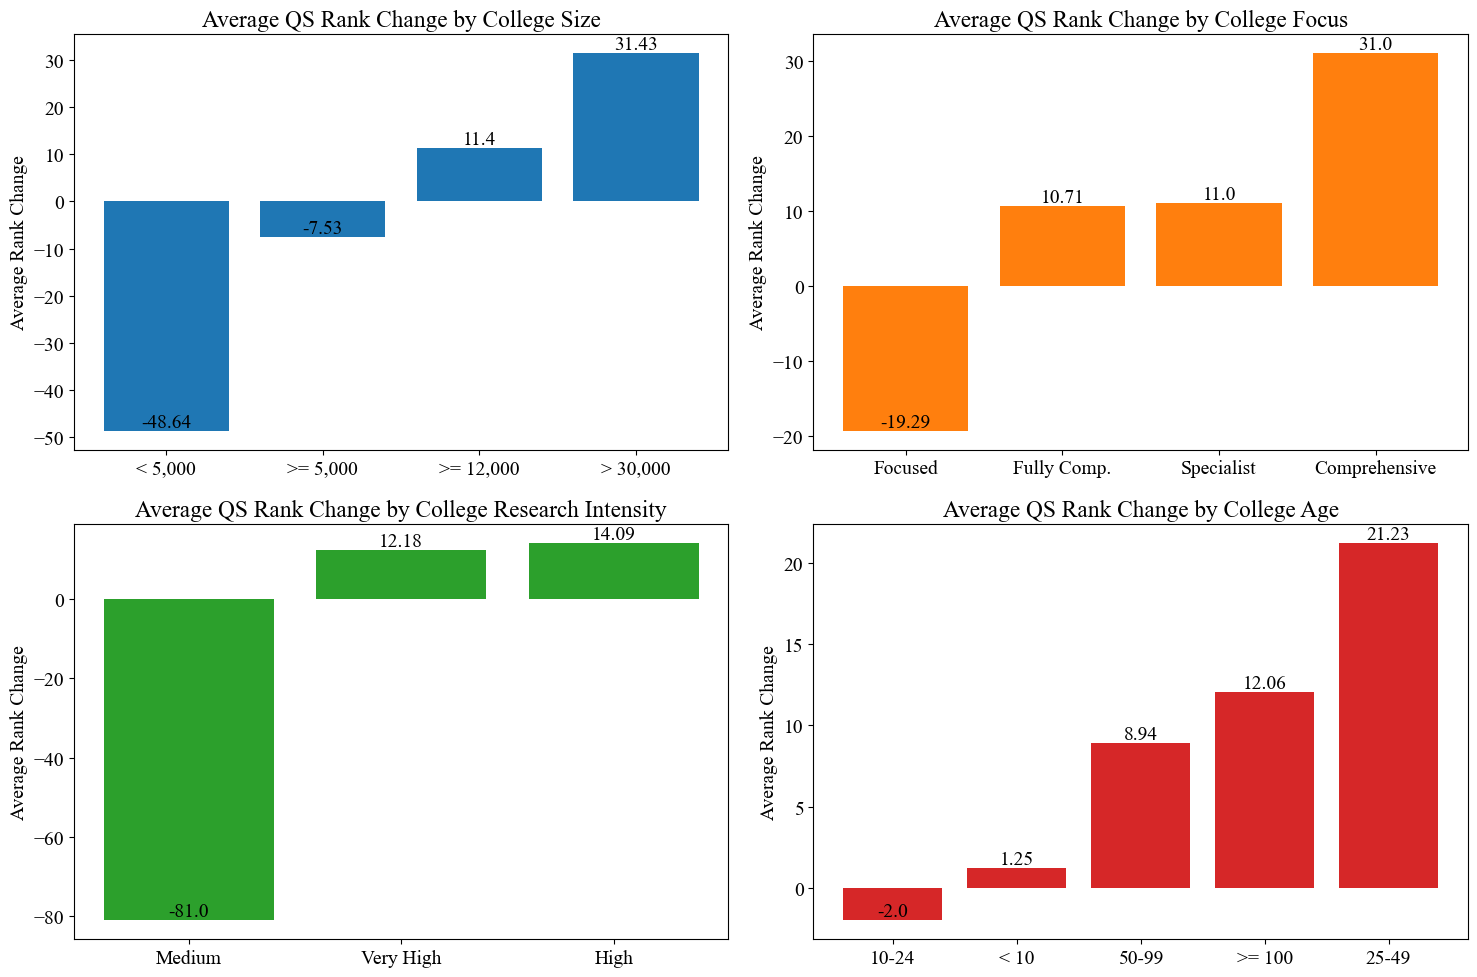

In [19]:
# Define the number of rows and columns for the subplots
row_n = 2
col_n = 2

# Calculate the mean of the 'Rank Change' column within each group and then sort them in ascending order based on the mean values
change_by_size = qs_data.groupby('SIZE')['Rank Change'].mean().sort_values()
change_by_focus = qs_data.groupby('FOCUS')['Rank Change'].mean().sort_values()
change_by_res = qs_data.groupby('RES.')['Rank Change'].mean().sort_values()
change_by_age = qs_data.groupby('AGE')['Rank Change'].mean().sort_values()

# Prepare figure and axes
fig, axs = plt.subplots(nrows=row_n, ncols=col_n, figsize=(15, 10))

# List of data to plot
change_by_categories = [change_by_size, change_by_focus, change_by_res, change_by_age]
category_titles = ['College Size', 'College Focus', 'College Research Intensity', 'College Age']

# Plot data
for i, ax in enumerate(axs.flatten()):
    data_to_plot = change_by_categories[i]
    bars = ax.bar(data_to_plot.index.astype(str), data_to_plot.values, color=plt.cm.tab10(i))
    ax.set_title(f'Average QS Rank Change by {category_titles[i]}')
    ax.set_ylabel('Average Rank Change')

    # Adding labels to each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### **6. Correlation between Overall Scores**

In [20]:
# This code won't be shown on the GitHub because it is an interactive plot
# The correlation between each column and the 'Overall SCORE' column, sorted in ascending order of correlation
qs_data_corr = qs_data.drop(['Rank Change', '2023 RANK', '2024 RANK'], axis=1, inplace=False).corr(numeric_only=True)['Overall SCORE'].drop('Overall SCORE').sort_values(ascending=True)

fig = px.bar(qs_data_corr, 
             x=qs_data_corr.index, 
             y=qs_data_corr.values,
             color=qs_data_corr.values,
             text=np.round(qs_data_corr.values,2),
             color_continuous_scale='YlOrRd')

fig.update_layout(
    title_text='Correlation between Variables and Overall Score of QS Ranking',
    template='plotly_white',
    xaxis=dict(
        title='Variables',
        titlefont_size=14
    ),
    yaxis=dict(
        title='Correlation with Overall Score',
        titlefont_size=14
    ),
    coloraxis_colorbar=dict(
        title='Correlation'
    )
)

fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)

fig.show()

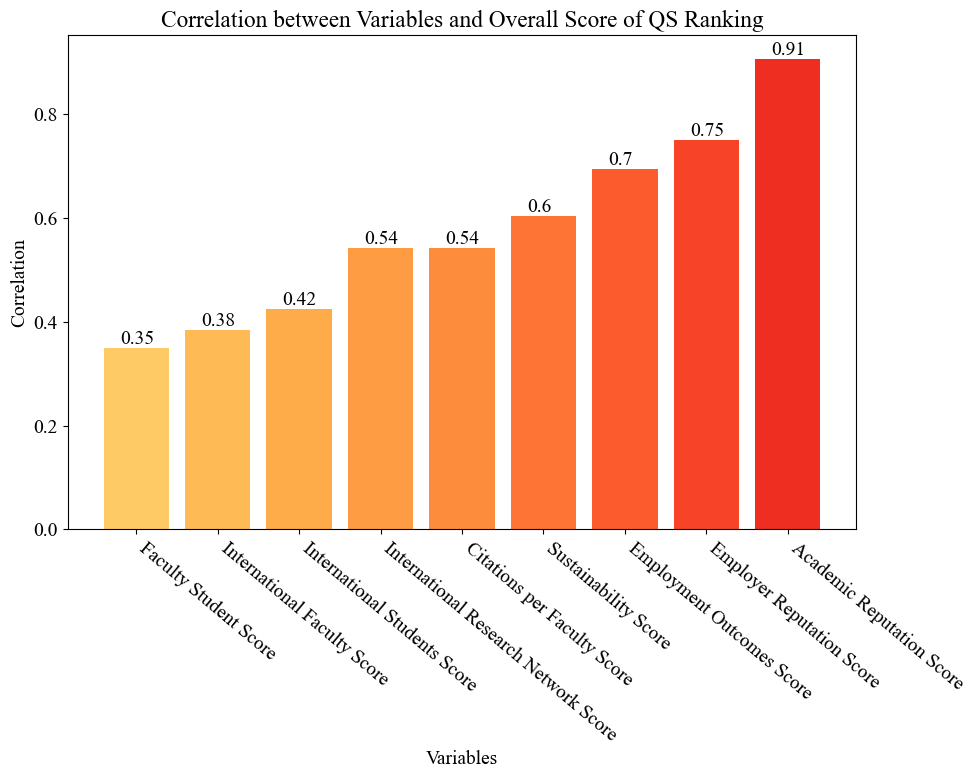

In [21]:
# Drop the specified columns and then calculate the correlation
qs_data_corr_corrected = qs_data.drop(['Rank Change', '2023 RANK', '2024 RANK'], axis=1, inplace=False).corr(numeric_only=True)['Overall SCORE'].sort_values(ascending=True)

# Remove the 'Overall SCORE' from the series to avoid self-correlation
qs_data_corr_corrected = qs_data_corr_corrected.drop('Overall SCORE')

# Plotting with matplotlib
plt.figure(figsize=(10, 8))
bars = plt.bar(qs_data_corr_corrected.index, qs_data_corr_corrected.values, color=plt.cm.YlOrRd(np.linspace(0.3, 0.7, len(qs_data_corr_corrected.values))))

# Adding the correlation values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.2, yval, round(yval, 2), va='bottom')

plt.title('Correlation between Variables and Overall Score of QS Ranking')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=-40, ha='left')  # Rotate the x labels to show them more clearly
plt.tight_layout()  # Adjust layout to fit all the labels
plt.show()
